<a href="https://colab.research.google.com/github/georgie-talukdar/masters/blob/main/Practical_6b_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 6b Regression using SVM

Again we're going to read in a file from a URL.

Once you've done this you will need to process the data so that missing values are removed or replaced with sensible values. 

Then finally we can get down to the machine learning. The way you use SVM is very similar to what you did with Linear Regression - so we don't need to give you all the details for that part. You can just look back at that.

The data: This is a set of results from an experiment where the number of initial bacteria, levels of CO2 light and sucrose excretion were varied. Four values can be predicted from this where the four values define a growth-rate curve for the bacteria.

## Reading in the data

Pandas nicely provides you with a method to read in data from a CSV file. The file can either be on your local hard disk or at a URL.

Once you've read in the data the first thing to do is to have a quick look at it - print it out.

In [1]:
import pandas as pd

data = pd.read_csv("http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/fitting-results.csv")

print(data)

       n_cyanos        co2     light  SucRatio  Nsample          a         mu  \
0           262  73.578860  0.367894  0.451505    13123   5.033993   5.483011   
1           610  74.582194  0.481606  0.969900    12474   1.018406   1.830727   
2           118  33.111037  0.625418  0.909699     8867   2.569159   3.330662   
3           159   8.027676  0.575251  0.137124    16494   1.837341   3.371570   
4           957  38.796599  0.939799  0.234114    10267   0.999268   2.059303   
...         ...        ...       ...       ...      ...        ...        ...   
19987       676  93.645548  0.270904  0.200669    12554   4.095631   5.133052   
19988        52  78.261087  0.331104  0.698997    10827  18.693225  14.312423   
19989       676  46.823274  0.936455  0.113712     9559   2.388540   3.774914   
19990        92  43.813271  0.886288  0.046823    17422  22.043032  19.048733   
19991       653   9.031010  0.050168  0.729097    18301   0.181946   2.201299   

            tau        a0  

## What are the different features

We can list the features using the list command

This data represents nearly 20,000 experiments when growing bacteria. There are four features you can predict from this data: 'a', 'mu', 'tau' and 'a0'. 

The features are:

| feature | description |
|-----|------|
| n_cyanos | The number of Cyanobacteria available at the start |
| co2 | The amount of CO2 available |
| light | The amount of light available |
| SucRatio | How good the bacteria is at producing sucrose |
| Nsample | Experiment number |
| a | Maximum number of bacteria seen |
| mu | Growth rate of bacteria |
| tau | Time delay before bacteria starts growing |
| a0 | Initial level of bacteria |

In [2]:
list(data)

['n_cyanos', 'co2', 'light', 'SucRatio', 'Nsample', 'a', 'mu', 'tau', 'a0']

In this case there is no missing data. But you should still look at the data to see what we have.

In [3]:
data['a'].value_counts()

0.000004    311
0.008889      3
0.004484      2
0.009091      2
0.004688      2
           ... 
0.560069      1
1.651303      1
1.341338      1
1.416024      1
0.181946      1
Name: a, Length: 19675, dtype: int64

## Producing the X and y data

The X data is all of the features without the features we want to predict and the y data is just the features we want to predict. 

We can remove Nsample here too as it has no value.

We can remove the features we want to predict (a, mu, tau, a0) from the data to produce X.

We can keep just the feature we want to predict using filter. As there are four features here we'll keep them all for now and separate them later.

## Exercise
1. Create X to be all columns apart from 'a', 'mu', 'tau', 'a0' and 'Nsamples'.
2. Create y to be just the columns 'a', 'mu', 'tau' and 'a0'.

In [4]:
X = data.drop(columns=['a', 'mu', 'tau', 'a0', 'Nsample']) #Delete
y = data.filter(['a', 'mu', 'tau', 'a0']) #Delete

## Split the data

We can now split the data into training and test data.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

We still have four features in y_train and y_test. We need to split these into four separate dataFrames so we can train a regressor on each of them.

In [6]:
y_train_a = y_train.filter('a').values.ravel()
y_test_a = y_test.filter('a')

## Exercise
The code above produces the separate data for 'a'. Produce the separate data for 'mu', 'tau' and 'a0'.

Note: Some people have reported an error on filter('mu'). If you get this error then use the 'formal' way of doing a filter:

```
y_train_mu = y_train.filter(items = ['mu']).values.ravel()
```

In [7]:
y_train_mu = y_train.filter(items=['mu']).values.ravel()
y_test_mu = y_test.filter(items=['mu'])

y_train_tau = y_train.filter('tau').values.ravel()
y_test_tau = y_test.filter('tau')

y_train_a0 = y_train.filter('a0').values.ravel()
y_test_a0 = y_test.filter('a0')

# Now the machine learning

sklearn is really good in the sense that all of the machine learning processes work in prety much the same way:

```
# import the appropriate regressor
from sklearn.linear_model import LinearRegression

# create an instance of that classifier
logistic = LinearRegression()

# Train it on our data
logistic.fit(X_train, y_train)
```

So we just need to change sklearn.linear_model.LinearRegression to sklearn.svm.SVR. Then change the instance you create to the correct regressor.

## Exercises
1. Create a Support Vector Regressor for this data. You'll need to produce one for each of 'a', 'mu', 'tau' and 'a0'.
3. For your Regressor look at the R^2 value. You can also plot predicted value against actual value. This should be close to a diagonal line from the bottom left to the top right.
3. Look at changing the C value and the kernel for SVR to see if you can improve the results.

# Delete from here

R^2(SVR_a) =  0.4367321362800176


Text(0, 0.5, 'Predicted A')

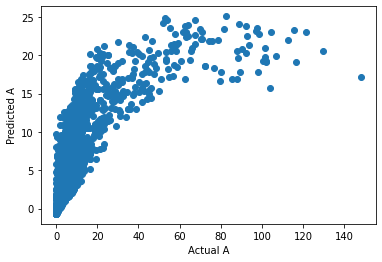

In [8]:
from sklearn.svm import SVR #Delete
import matplotlib.pyplot as plt

svr_a = SVR() #Delete

svr_a.fit(X_train, y_train_a) #Delete

print('R^2(SVR_a) = ', svr_a.score(X_test, y_test_a)) #Delete

# Let's plot
y_pred_a  = svr_a.predict(X_test)
plt.scatter(y_test_a,y_pred_a)
plt.xlabel('Actual A')
plt.ylabel('Predicted A')

R^2(SVR_mu) =  0.44699930515266106


Text(0, 0.5, 'Predicted mu')

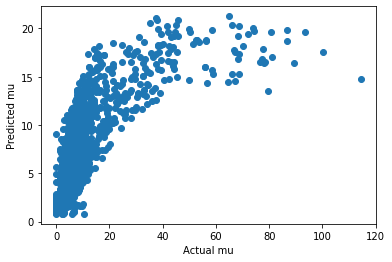

In [9]:
svr_mu = SVR() #Delete

svr_mu.fit(X_train, y_train_mu) #Delete

print('R^2(SVR_mu) = ', svr_mu.score(X_test, y_test_mu)) #Delete

# Let's plot
y_pred_mu  = svr_mu.predict(X_test)
plt.scatter(y_test_mu,y_pred_mu)
plt.xlabel('Actual mu')
plt.ylabel('Predicted mu')

R^2(SVR_tau) =  0.4367321362800176


Text(0, 0.5, 'Predicted tau')

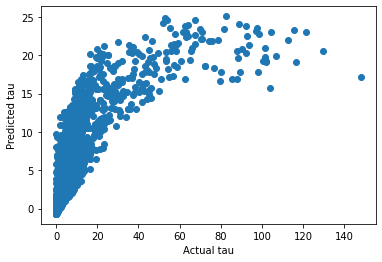

In [10]:
svr_tau = SVR() #Delete

svr_tau.fit(X_train, y_train_tau) #Delete

print('R^2(SVR_tau) = ', svr_tau.score(X_test, y_test_tau)) #Delete

# Let's plot
y_pred_tau = svr_tau.predict(X_test)
plt.scatter(y_test_a,y_pred_a)
plt.xlabel('Actual tau')
plt.ylabel('Predicted tau')

R^2(SVR_a0) =  0.4367321362800176


Text(0, 0.5, 'Predicted A0')

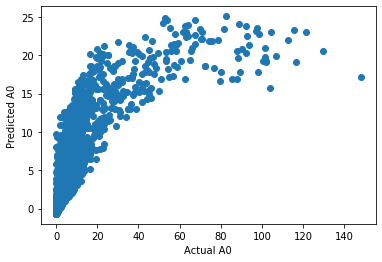

In [11]:
svr_a0 = SVR() #Delete

svr_a0.fit(X_train, y_train_a0) #Delete

print('R^2(SVR_a0) = ', svr_a0.score(X_test, y_test_a0)) #Delete

# Let's plot
y_pred_a0  = svr_a0.predict(X_test)
plt.scatter(y_test_a0,y_pred_a0)
plt.xlabel('Actual A0')
plt.ylabel('Predicted A0')

Make these into a function so we can test C

In [12]:
def optimiseC(X_train, y_train_a, y_train_mu, y_train_tau, y_train_a0, y_test_a, y_test_mu, y_test_tau, y_test_a0, X_test, Cval, kernelK = 'rbf'):
  svr_a = SVR(C=Cval, kernel=kernelK)
  svr_a.fit(X_train, y_train_a)
  print('R^2(SVR_a) = ', svr_a.score(X_test, y_test_a))

  svr_mu = SVR(C=Cval, kernel=kernelK)
  svr_mu.fit(X_train, y_train_mu)
  print('R^2(SVR_mu) = ', svr_mu.score(X_test, y_test_mu))

  svr_tau = SVR(C=Cval, kernel=kernelK)
  svr_tau.fit(X_train, y_train_tau)
  print('R^2(SVR_tau) = ', svr_tau.score(X_test, y_test_tau))

  svr_a0 = SVR(C=Cval, kernel=kernelK)
  svr_a0.fit(X_train, y_train_a0)
  print('R^2(SVR_a0) = ', svr_a0.score(X_test, y_test_a0))

kernel can take value of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’

In [13]:
optimiseC(X_train, y_train_a, y_train_mu, y_train_tau, y_train_a0, y_test_a, y_test_mu, y_test_tau, y_test_a0, X_test, 64, 'rbf')

R^2(SVR_a) =  0.6688198039383195
R^2(SVR_mu) =  0.6527455905963342
R^2(SVR_tau) =  0.6688198039383195
R^2(SVR_a0) =  0.6688198039383195


Aside - If you try RandomForestRegressor on this data you get a much better result.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

rf_a = RandomForestRegressor()

rf_a.fit(X_train, y_train_a)

y_pred_a = rf_a.predict(X_test)
print('MAE(a): ', mean_absolute_error(y_test_a, y_pred_a))
print('MSE(a): ', mean_squared_error(y_test_a, y_pred_a))
print('R^2:    ', rf_a.score(X_test, y_test_a))

MAE(a):  0.30959939077032683
MSE(a):  2.390380961458876
R^2:     0.9846475976724355
